Sports data is dynamic, but nba_api has been constantly updated and helps to request updated data about each specific team from nba.com.

1)
Install nba_api through command: pip install nba_api

Import the module teams. The method get_teams returns a list of dictionaries

In [1]:
import pandas as pd
import numpy as np
from nba_api.stats.static import teams

In [2]:
nba_teams=teams.get_teams()
print(type(nba_teams))
print(nba_teams[:5])     

<class 'list'>
[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Atlanta', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}, {'id': 1610612740, 'full_name': 'New Orleans Pelicans', 'abbreviation': 'NOP', 'nickname': 'Pelicans', 'city': 'New Orleans', 'state': 'Louisiana', 'year_founded': 2002}, {'id': 1610612741, 'full_name': 'Chicago Bulls', 'abbreviation': 'CHI', 'nickname': 'Bulls', 'city': 'Chicago', 'state': 'Illinois', 'year_founded': 1966}]


2) Convert the list of dictionaries into a table (as a dictionary), in away that each row contains the information for a different team.

In [3]:
def createDic(list_dict):
  keys=list_dict[0].keys()
  dictionary={key:[] for key in keys}
  for dic in list_dict:
    for key, value in dic.items():
      dictionary[key].append(value)
  return dictionary


dict_nba_team=createDic(nba_teams)
df_team=pd.DataFrame(dict_nba_team)
df_team.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


3) Find the warriors'id.

In [4]:
df_warriors=df_team[df_team["nickname"]=="Warriors"]
id_warriors=print(df_warriors[['id']])


           id
7  1610612744


4) Send an HTTP request to nba.com to take the info about all the games the warriors played with. The requested information is provided and is transmitted via an HTTP response. 

To make a request for a specific team, team's unique id is required which is stored locally in the API (no need for Jason file). 

Import 'Leaguegamefinder' function which calls an API. The parameter 'team_id_nullable' is the warriors'unique id. 

In [5]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder=leaguegamefinder.LeagueGameFinder (team_id_nullable=id_warriors)
games=gamefinder.get_data_frames()[0]
games.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12019,1610612761,TOR,Toronto Raptors,0011900129,2020-07-28,TOR @ PHX,L,240,106,...,0.783,6,40,46,23,6,6,28,26,-7.0
1,12019,1610612756,PHX,Phoenix Suns,0011900129,2020-07-28,PHX vs. TOR,W,241,117,...,0.955,5,30,35,28,22,4,18,24,10.0
2,22020,1611661322,WAS,Washington Mystics,1022001007,2020-07-28,WAS @ CON,None,100,48,...,0.846,4,12,16,8,6,0,9,18,0.4
3,12019,1610612738,BOS,Boston Celtics,0011900132,2020-07-28,BOS @ HOU,None,0,10,...,NaN,2,3,5,2,3,0,1,2,9.0
4,12019,1610612760,OKC,Oklahoma City Thunder,0011900131,2020-07-28,OKC @ POR,None,215,129,...,0.654,10,28,38,30,14,4,13,17,19.4


5) The column match-up contains name of the team that the warriors were playing vs. whether it is a home game or an away game(@ symbol).

'GSW' stands for Golden State Warriors team and 'TOR' means Toronto Raptors. 

Create two DF, one for the games where the warriors faced the raptors at home, and the second for away games. 


In [6]:
games_home=games[games["MATCHUP"]=="GSW vs. TOR"]
games_away=games[games["MATCHUP"]=="GSW @ TOR"]
games_home.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
235,22019,1610612744,GSW,Golden State Warriors,0021900929,2020-03-05,GSW vs. TOR,L,240,113,...,0.760,14,38,52,34,4,5,15,23,-8.0
4029,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6,37,43,18,8,3,20,25,10.0
4264,42018,1610612744,GSW,Golden State Warriors,0041800406,2019-06-13,GSW vs. TOR,L,240,110,...,0.700,11,31,42,28,9,6,16,23,-4.0
4298,42018,1610612744,GSW,Golden State Warriors,0041800404,2019-06-07,GSW vs. TOR,L,241,92,...,0.667,8,34,42,26,6,6,17,23,-13.0
4327,42018,1610612744,GSW,Golden State Warriors,0041800403,2019-06-05,GSW vs. TOR,L,241,109,...,0.833,13,28,41,25,8,3,14,21,-14.0


6) Plot out the plus_minus column for both DataFrames. The plus_minus column contains information on the score. 


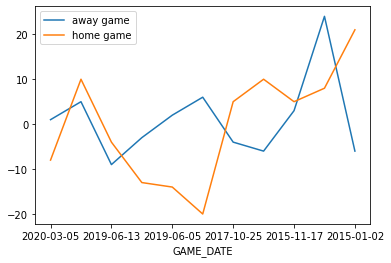

In [7]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
games_away.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
games_home.plot(x="GAME_DATE",y="PLUS_MINUS",ax=ax)
ax.legend(["away game","home game"])
plt.show()

#Finding: Warriors have played better at home.